# Sentiment Analysis of Google Reviews

In [2]:
import gdown
import pandas as pd

# URL for the file from Google Drive
file_url = 'https://drive.google.com/uc?id=1FZXoO3-sfFBol2UbQWtvaXDmaQZ0ZgkD'  # Replace with your actual file ID.

# Download the file using gdown
gdown.download(file_url, 'reviews.csv', quiet=False)

# Now, read the file into a pandas DataFrame
df = pd.read_csv('reviews.csv')

Downloading...
From: https://drive.google.com/uc?id=1FZXoO3-sfFBol2UbQWtvaXDmaQZ0ZgkD
To: C:\Users\Rishi\Sentiment Analysis\reviews.csv
100%|█████████████████████████████████████████████████████████████████████████████| 9.00M/9.00M [00:02<00:00, 3.27MB/s]


In [3]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOHNHm4OfbjkxEXXa51JwZEHAaDlvfSgN0OU256...,Lex S,https://lh3.googleusercontent.com/-FgDpDeEJLAw...,"I love this app, but I do have one major gripe...",1,3,5.2.0.23,2020-08-05 16:22:04,Any.do is not only a product but also a servic...,2020-08-05 08:02:08,most_relevant,com.anydo
1,gp:AOqpTOEujjLj56XVqumAkipImEqIAU3qTIuQjENPaOK...,Sam van Dijk,https://lh3.googleusercontent.com/-pO3wTIb4myA...,"Trash. Yes, it has some nice nifty features bu...",1,25,5.2.0.23,2020-07-21 22:17:25,"Premium users can edit, create and delete tags...",2020-07-23 15:57:51,most_relevant,com.anydo
2,gp:AOqpTOElISilniODwd6UBrqFngzTtDHLF-G0VLpR2_y...,Hugo Bounoua,https://lh3.googleusercontent.com/a-/AOh14GgxG...,"OMG the UI is awful, seriously you have popup ...",1,8,5.2.0.23,2020-07-22 07:23:35,The Premium ad only shows up when first openin...,2020-07-23 16:20:43,most_relevant,com.anydo
3,gp:AOqpTOEkZ75JR5CzVhxoxWa0XVmPanw_pEl1srcJ7yv...,Aishwarya Mishra,https://lh3.googleusercontent.com/a-/AOh14Ghhq...,I've been using the app for a while and since ...,1,20,5.2.0.23,2020-07-19 06:49:15,"Hi, due to new restrictions from Google, the p...",2020-07-22 14:05:56,most_relevant,com.anydo
4,gp:AOqpTOEtpLcODD_NZOBqR1N7DBbaLdw3Gyz3v3xZAp1...,Mad Scientist,https://lh3.googleusercontent.com/-kIZF4kMt6yY...,"Unable to register with an email. Clicking""con...",1,77,5.2.0.9,2020-07-10 17:59:22,We are unaware of any issues with signing in t...,2020-07-12 08:02:19,most_relevant,com.anydo


## Exploratory Data Analysis (EDA)

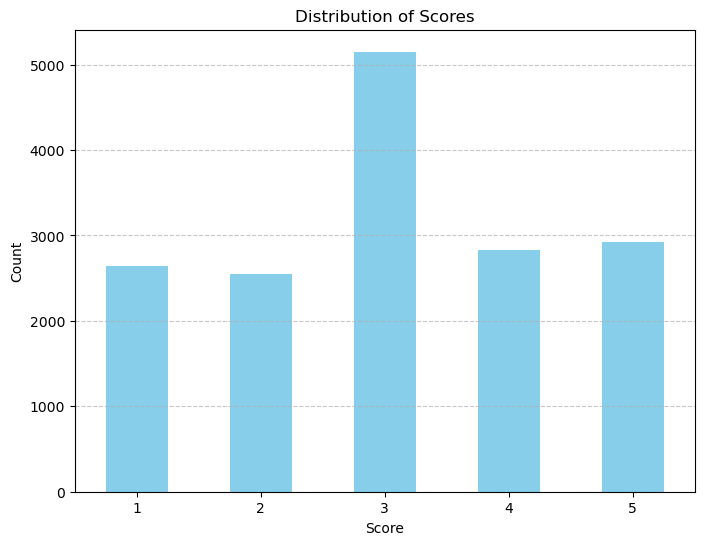

In [62]:
import matplotlib.pyplot as plt

# Plot the distribution of the 'score' column
plt.figure(figsize=(8, 6))
df['score'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Sentiment distribution:
sentiment
positive    5754
negative    5188
neutral     5150
Name: count, dtype: int64


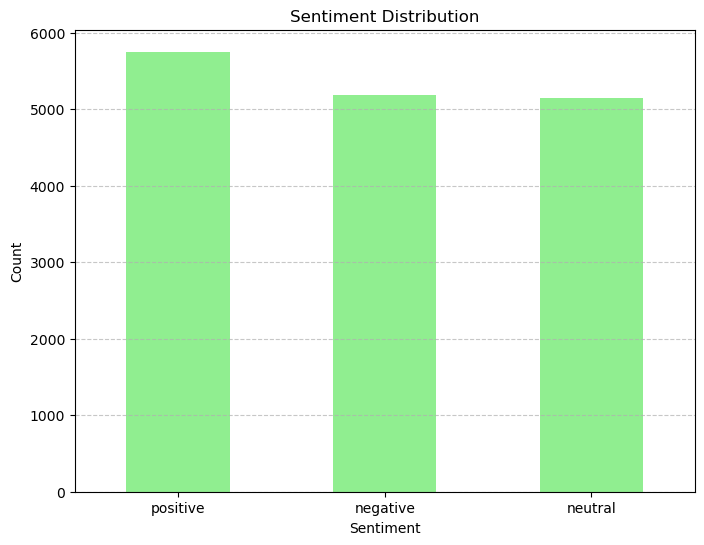

In [108]:
# Step 3: Map scores to sentiment (1, 2 = negative; 3 = neutral; 4, 5 = positive)
def map_score_to_sentiment(score):
    if score in [1, 2]:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['score'].apply(map_score_to_sentiment)

# Step 4: Sentiment distribution
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
df['sentiment'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Traditional ML Algorithm

In [65]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import nltk

# Ensure necessary nltk data is downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Load the data
df = pd.read_csv('reviews.csv')

# Map the scores to sentiment categories
def map_score_to_sentiment(score):
    if score in [1, 2]:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['score'].apply(map_score_to_sentiment)

# Preprocess the content (lowercase, remove punctuation, stemming, lemmatization)
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize and remove stopwords
    tokens = [word for word in text.split() if word not in stop_words]

    # Stemming and Lemmatization
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization

    # Rejoin tokens to form the processed string
    return ' '.join(tokens)

# Apply preprocessing
df['processed_content'] = df['content'].apply(preprocess_text)

# Step 1: Create the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Feature extraction using TF-IDF
    ('classifier', MultinomialNB())  # Naive Bayes classifier
])

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(df['processed_content'], df['sentiment'], test_size=0.2, random_state=42)

# Step 3: Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Step 4: Define a function that uses the pipeline to predict sentiment for a given sentence
def predict_sentiment(sentence):
    # Preprocess the input sentence
    processed_sentence = preprocess_text(sentence)
    # Predict sentiment using the trained pipeline
    prediction = pipeline.predict([processed_sentence])[0]
    return prediction



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [96]:
# Example usage
sentence = input("Enter the Review: ")
# I love this app! It's so useful and easy to use.
# I hate this app! It's so bad and difficult to use.
print(f"Sentiment: {predict_sentiment(sentence)}")
# I love the way you are teaching
# never buy this product waste of money


Enter the Review:  I love this app! It's so useful and easy to use.


Sentiment: positive


# Generative AI

In [2]:
api_key = "" # Use your API Key Here

In [6]:
import google.generativeai as genai
import json

In [7]:
genai.configure(api_key="") # Use your API Key Here

In [71]:
def get_gemini_repsonse(input):
    model=genai.GenerativeModel('gemini-pro')
    response=model.generate_content(input)
    return response.text

In [72]:
get_gemini_repsonse("Hi")

'Hello there! How can I assist you today?'

In [73]:
def build_prompt(text):
    input_prompt=f"""
    Analyze the sentiment of the following text.
    The sentiment should be classified as one of the following:
    'positive', 'neutral', or 'negative'. Provide the sentiment.

    Text:{text}

    I want the response in one single string having the structure
    {{"sentiment":"%"}}
    """
    return input_prompt

In [74]:
sentence = input("Enter the Review \n")

Enter the Review 
 I hate this app! It's so bad and difficult to use.


In [75]:
# this is something i truly love about scaler. Masterclasses is helpful and everyone can learn many topics. This is mindblowing
sentence

"I hate this app! It's so bad and difficult to use."

In [76]:
input_prompt = build_prompt(sentence)

In [77]:
print(input_prompt)


    Analyze the sentiment of the following text.
    The sentiment should be classified as one of the following:
    'positive', 'neutral', or 'negative'. Provide the sentiment.

    Text:I hate this app! It's so bad and difficult to use.

    I want the response in one single string having the structure
    {"sentiment":"%"}
    


In [78]:
response=get_gemini_repsonse(input_prompt)
response

'{"sentiment":"negative"}'